In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

load data

In [2]:
data= pd.read_csv("census2004_2024.csv")

In [3]:
data= data.dropna()

In [4]:
data_renamed = data.rename(columns={
    'Life.Expectancy.at.Birth..Both.Sexes': 'Life Expectancy (Both)',
    'Life.Expectancy.at.Birth..Males': 'Life Expectancy (Male)',
    'Life.Expectancy.at.Birth..Females': 'Life Expectancy (Female)',
    'Under.Age.5.Mortality..Both.Sexes': 'Mortality Under 5 (Both)',
    'Under.Age.5.Mortality..Males': 'Mortality Under 5 (Male)',
    'Under.Age.5.Mortality..Females': 'Mortality Under 5 (Female)'
})

In [5]:

col_name= ['Life Expectancy (Both)', 'Life Expectancy (Male)',
       'Life Expectancy (Female)', 'Mortality Under 5 (Both)',
       'Mortality Under 5 (Male)', 'Mortality Under 5 (Female)']

mean_dict= dict()
std_dict= dict()

for col in col_name:

    mean_dict[col] = data_renamed[col].mean()
    std_dict[col]= data_renamed[col].std()

mean_df = pd.DataFrame.from_dict(mean_dict, orient='index', columns=['Mean'])
std_df = pd.DataFrame.from_dict(std_dict, orient='index', columns=['Standard Deviation'])

# Combine mean and std DataFrames into a single DataFrame
summary_df = pd.concat([mean_df, std_df], axis=1)

In [6]:
summary_df

,Mean,Standard Deviation
Life Expectancy (Both),72.376629,8.460571
Life Expectancy (Male),70.002472,8.193489
Life Expectancy (Female),74.875730,8.862945
Mortality Under 5 (Both),35.027865,40.217156
Mortality Under 5 (Male),37.802022,42.342449
Mortality Under 5 (Female),32.131236,38.129050


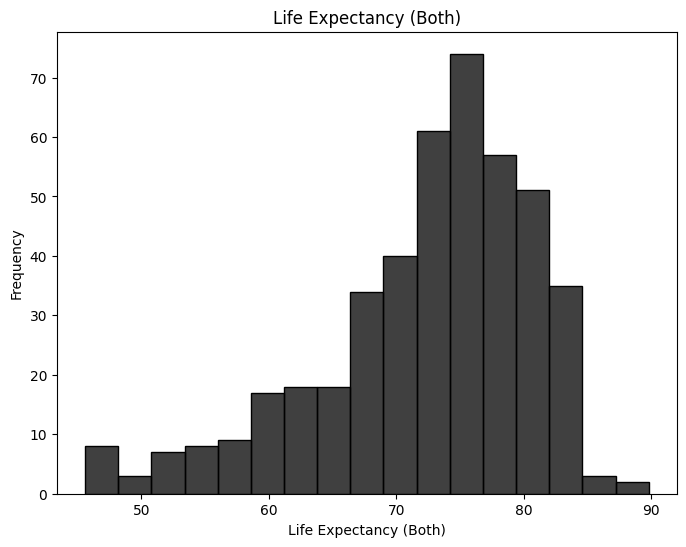

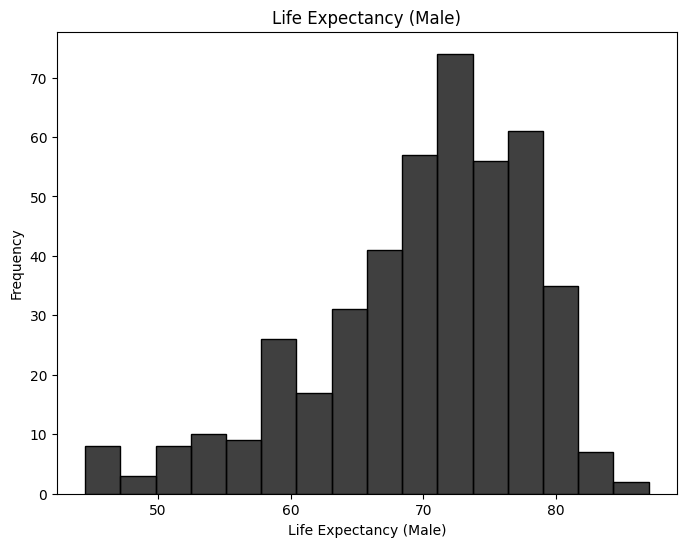

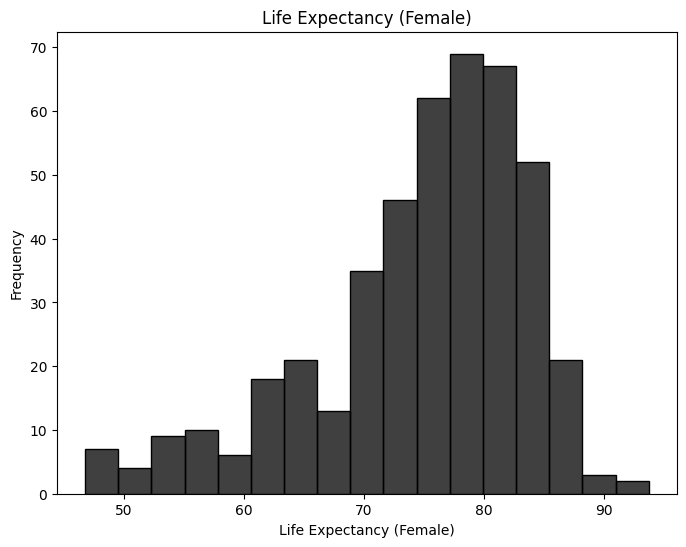

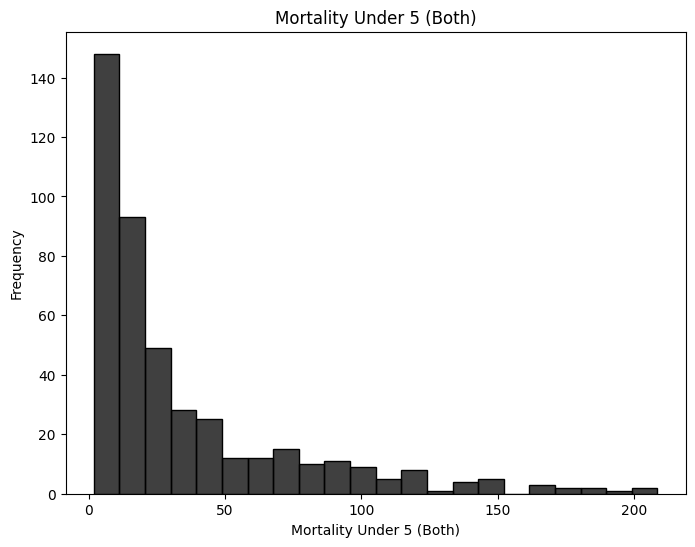

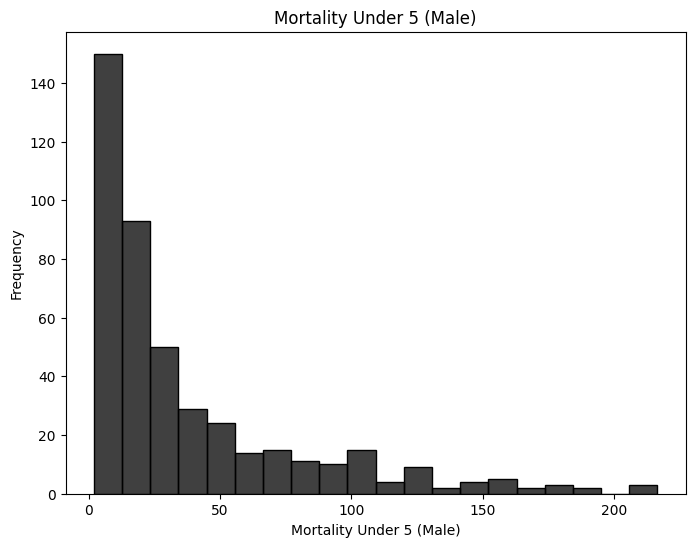

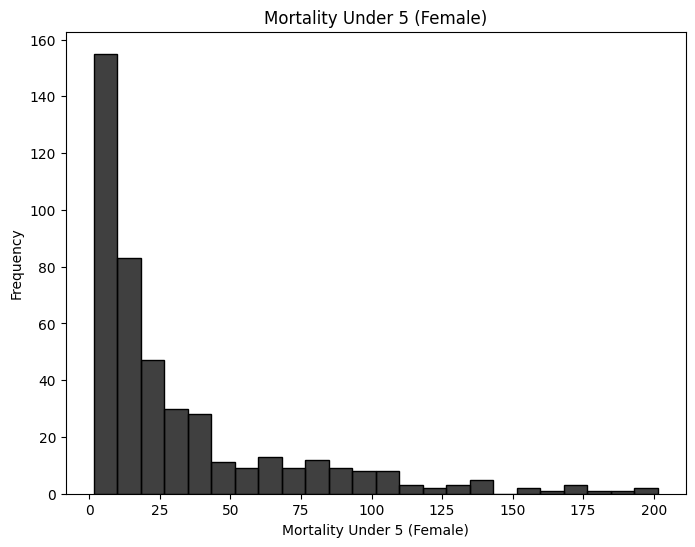

In [7]:


for col in col_name:
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    try:
        sns.histplot(data_renamed[col], color="black")
        plt.xlabel(col)
        plt.title(col)
        plt.ylabel("Frequency")
        plt.show()  # Display the plot

    except Exception as e:
        print(f"Error plotting {col}: {e}")
plt.show()

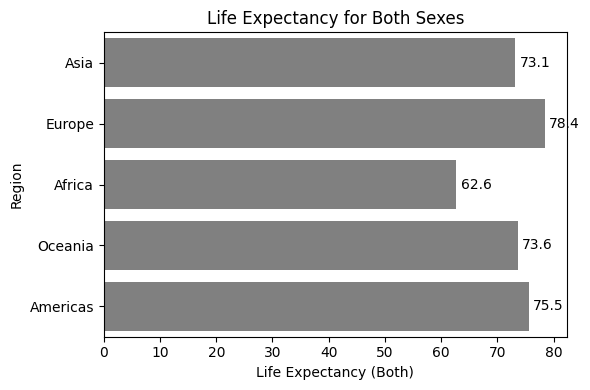

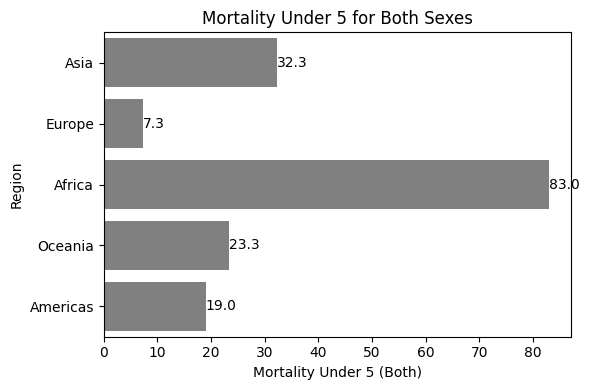

In [8]:
selected_columns = ["Life Expectancy (Both)", "Mortality Under 5 (Both)"]

# Plot for Life Expectancy (Both)
plt.figure(figsize=(6, 4))
plot = sns.barplot(data=data_renamed, x="Life Expectancy (Both)", estimator="mean", y="Region", color="gray", errorbar=None)
plt.title("Life Expectancy for Both Sexes")
plt.xlabel("Life Expectancy (Both)")
plt.ylabel("Region")

# Annotate each bar with the mean value
for p in plot.patches:
    width = p.get_width()
    plt.text(width + 0.8, p.get_y() + p.get_height() / 2, f'{width:.1f}', va='center')

plt.tight_layout()
plt.show()

# Plot for Mortality Under 5 (Both)
plt.figure(figsize=(6, 4))
plot = sns.barplot(data=data_renamed, x="Mortality Under 5 (Both)", estimator="mean", y="Region", color="gray", errorbar=None)
plt.title("Mortality Under 5 for Both Sexes")
plt.xlabel("Mortality Under 5 (Both)")
plt.ylabel("Region")

# Annotate each bar with the mean value
for p in plot.patches:
    width = p.get_width()
    plt.text(width + 0., p.get_y() + p.get_height() / 2, f'{width:.1f}', va='center')

plt.tight_layout()
plt.show()

In [9]:
region = data_renamed[(data_renamed["Region"]=="Asia") & (data["Year"]==2024)]

In [10]:
region.head()


,Name,Year,Life Expectancy (Both),Life Expectancy (Male),Life Expectancy (Female),Mortality Under 5 (Both),Mortality Under 5 (Male),Mortality Under 5 (Female),Subregion,Region
227,Afghanistan,2024,54.4,52.8,56.1,148.5,156.2,140.4,South-Central Asia,Asia
236,Armenia,2024,76.7,73.4,80.1,13.2,14.6,11.6,Western Asia,Asia
240,Azerbaijan,2024,75.9,73.5,78.6,12.3,14.1,10.2,Western Asia,Asia
242,Bahrain,2024,80.4,78.1,82.7,11.5,13.4,9.6,Western Asia,Asia
243,Bangladesh,2024,75.2,73.1,77.5,35.5,38.1,32.7,South-Central Asia,Asia


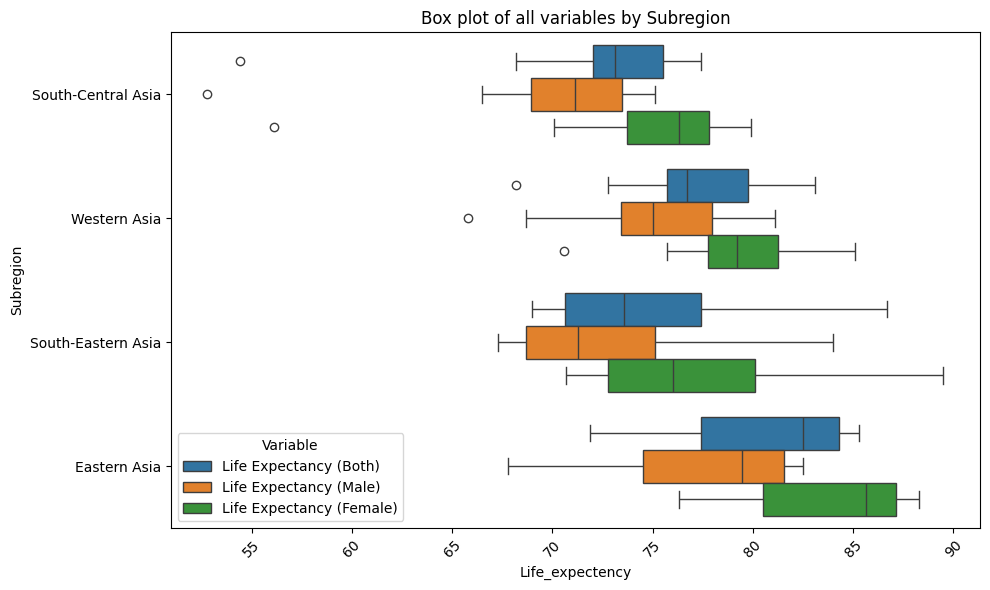

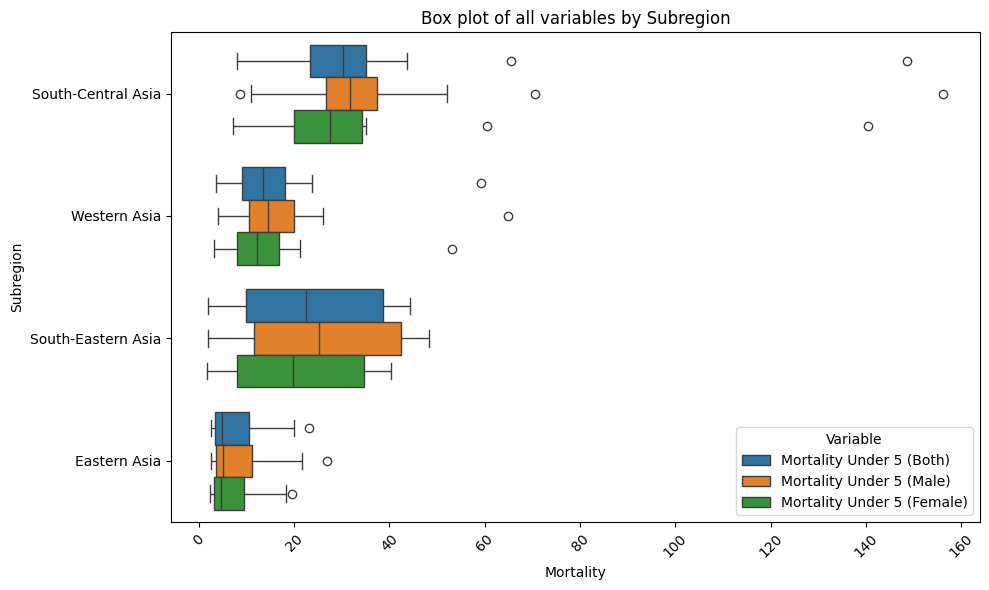

In [11]:
life_expectency = region[['Life Expectancy (Both)', 'Life Expectancy (Male)',
       'Life Expectancy (Female)','Subregion']]
mortality = region[[ 'Mortality Under 5 (Both)',
       'Mortality Under 5 (Male)', 'Mortality Under 5 (Female)','Subregion']]

# Melt the DataFrame to long format (for easier plotting with seaborn)
life_expectency_melted = pd.melt(life_expectency, id_vars=["Subregion"], 
                        var_name="Variable", value_name="Value")

mortality_melted = pd.melt(mortality, id_vars=["Subregion"], 
                            var_name="Variable", value_name="Value")


# Create a box plot showing all variables in each Subregion
plt.figure(figsize=(10, 6))
sns.boxplot(x='Value', y='Subregion', hue='Variable', data=life_expectency_melted)

# Set plot title and labels
plt.title("Box plot of all variables by Subregion")
plt.xlabel("Life_expectency")
plt.ylabel("Subregion")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Value', y='Subregion', hue='Variable', data=mortality_melted)

# Set plot title and labels
plt.title("Box plot of all variables by Subregion")
plt.xlabel("Mortality")
plt.ylabel("Subregion")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
print(region[col_name].columns)

Index(['Life Expectancy (Both)', 'Life Expectancy (Male)',
       'Life Expectancy (Female)', 'Mortality Under 5 (Both)',
       'Mortality Under 5 (Male)', 'Mortality Under 5 (Female)'],
      dtype='object')


In [13]:
# List of column n# Replace with your actual column names

# Dictionary to store IQR values by Subregion for each column
iqr_dict = {}

# Calculate IQR for each column in colname grouped by Subregion
for col in col_name:
    iqr_dict[col] = region.groupby('Subregion')[col].quantile(0.75) - region.groupby('Subregion')[col].quantile(0.25)


iqr= pd.DataFrame(iqr_dict)
iqr


,Life Expectancy (Both),Life Expectancy (Male),Life Expectancy (Female),Mortality Under 5 (Both),Mortality Under 5 (Male),Mortality Under 5 (Female)
Subregion,,,,,,
Eastern Asia,6.900,7.00,6.625,7.075,7.675,6.400
South-Central Asia,3.475,4.55,4.075,11.750,10.725,14.175
South-Eastern Asia,6.750,6.40,7.300,28.600,30.750,26.500
Western Asia,4.050,4.50,3.500,9.100,9.400,8.900


In [14]:
median_dict = {}

# Calculate IQR for each column in colname grouped by Subregion
for col in col_name:
    median_dict[col] = region.groupby('Subregion')[col].median()

median= pd.DataFrame(median_dict)
median

,Life Expectancy (Both),Life Expectancy (Male),Life Expectancy (Female),Mortality Under 5 (Both),Mortality Under 5 (Male),Mortality Under 5 (Female)
Subregion,,,,,,
Eastern Asia,82.50,79.45,85.65,4.85,5.05,4.55
South-Central Asia,73.15,71.15,76.30,30.30,31.65,27.50
South-Eastern Asia,73.60,71.30,76.00,22.50,25.20,19.70
Western Asia,76.70,75.00,79.20,13.40,14.60,12.10


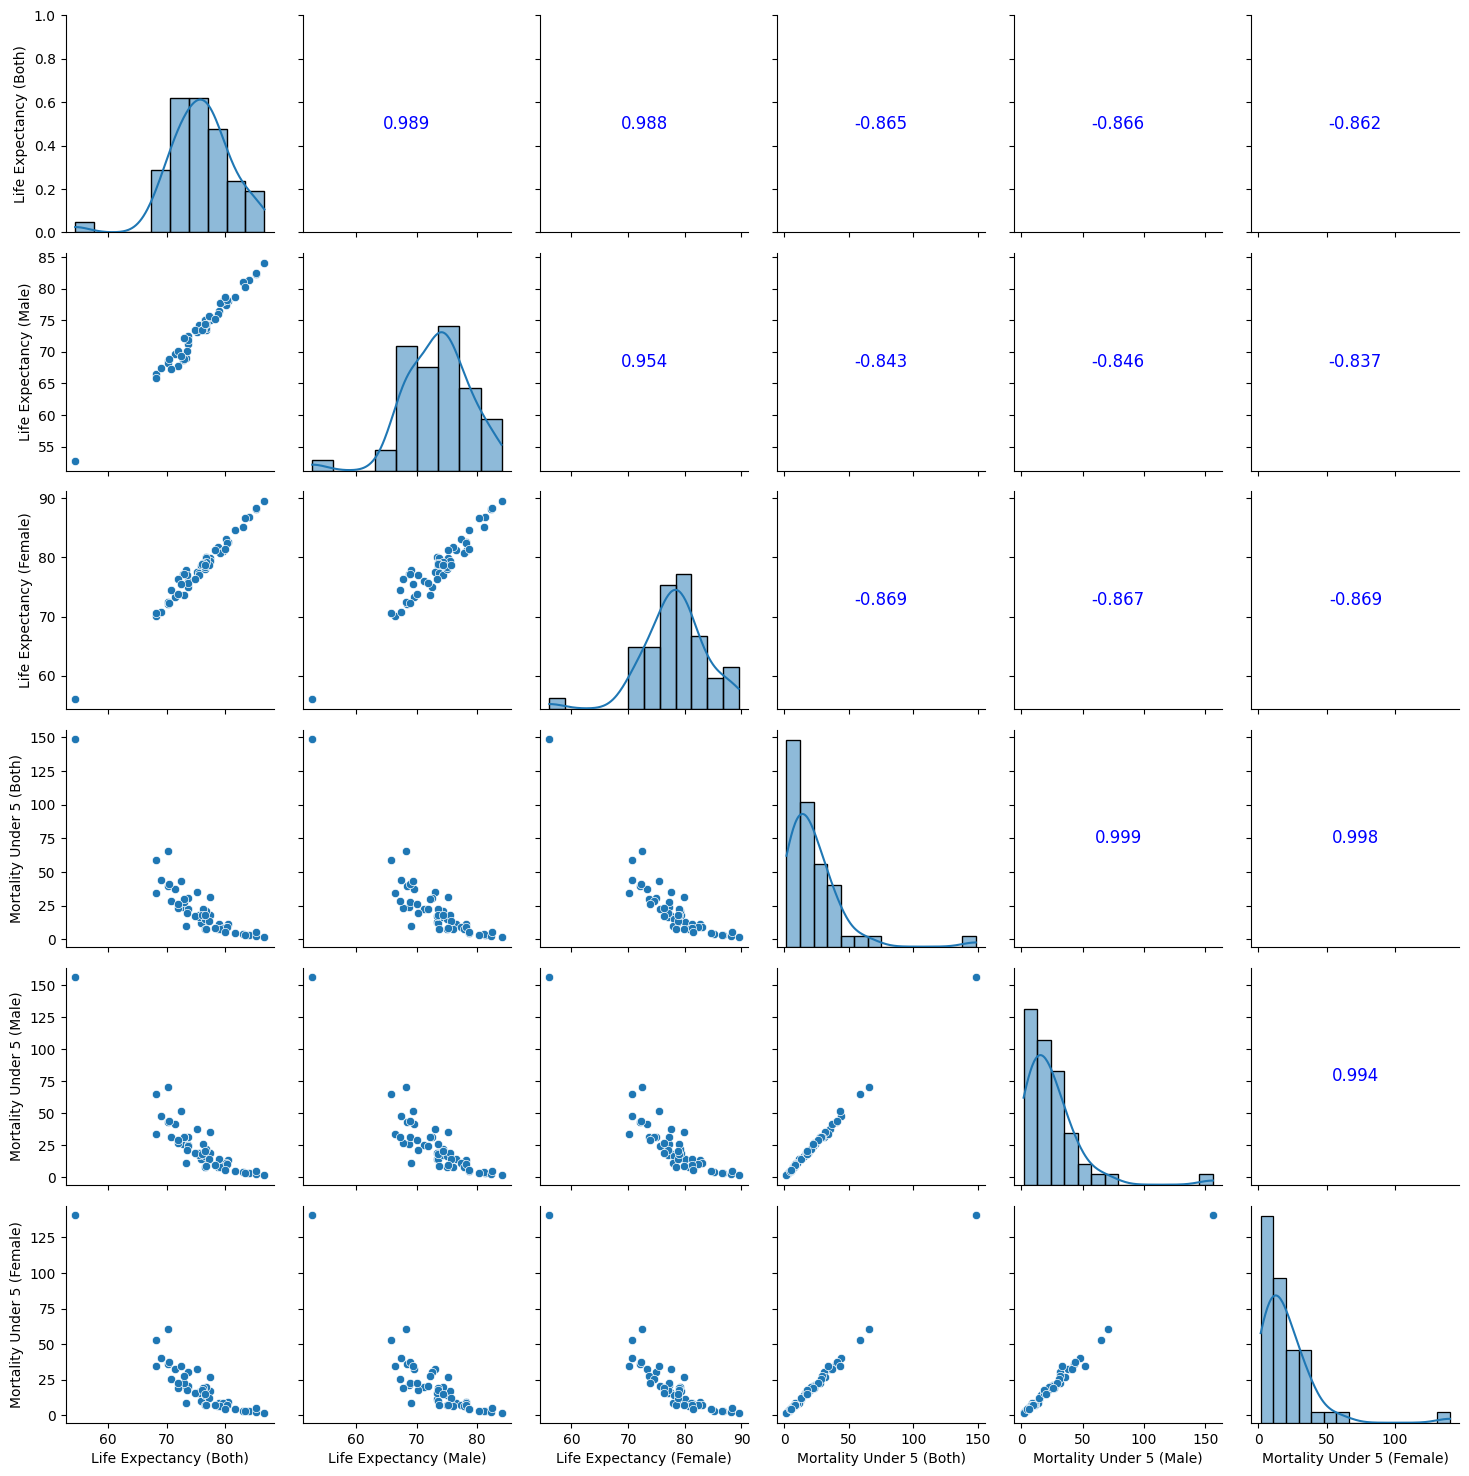

In [15]:
pairplot_data = region[col_name].copy()

# Rename columns for display clarity
# pairplot_data.columns = ['LE Both', 'LE Males', 'LE Females', 'MR Both', 'MR Males', 'MR Females']

# Initialize a pair plot
g = sns.PairGrid(pairplot_data)

# Lower triangle for scatter plots
g.map_lower(sns.scatterplot)

# Diagonal for histograms
g.map_diag(sns.histplot, kde=True)

# Upper triangle for correlation coefficients
def corrfunc(x, y, **kwargs):
    corr = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f'{corr:.3f}', xy=(0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center', fontsize=12, color='blue')

g.map_upper(corrfunc)

plt.show()


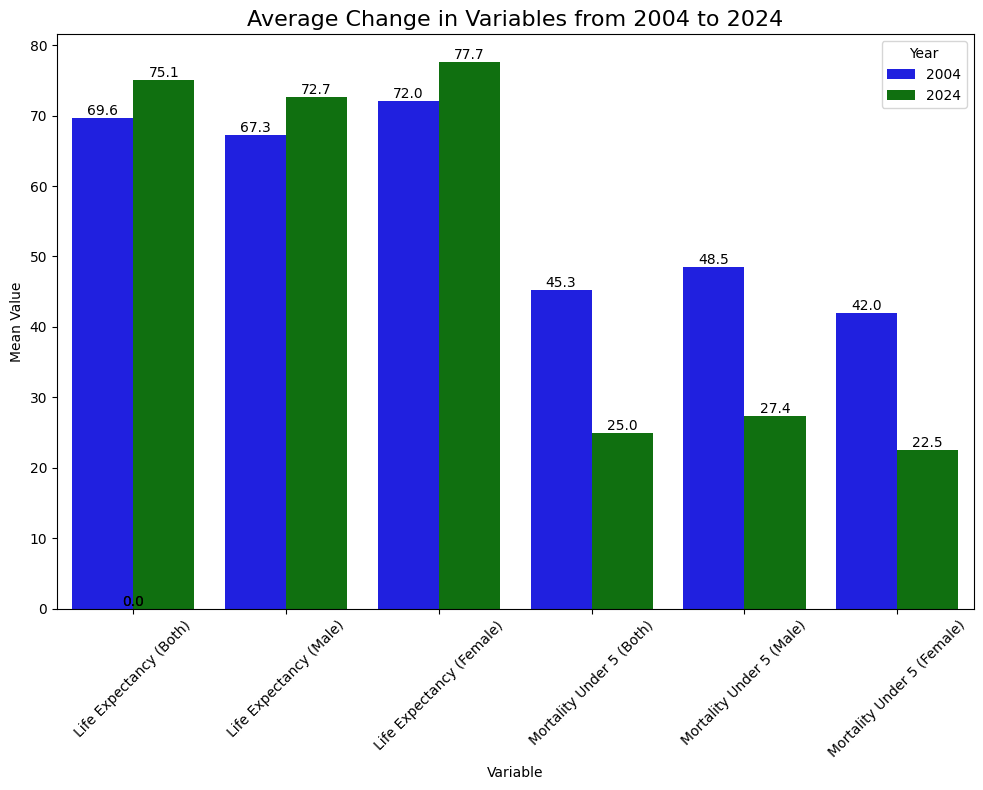

In [16]:


mean_2004 = data_renamed[data_renamed['Year'] == 2004][col_name].mean()
mean_2024 = data_renamed[data_renamed['Year'] == 2024][col_name].mean()

# Combine the two mean series into a DataFrame
mean_df = pd.DataFrame({'2004': mean_2004, '2024': mean_2024}).reset_index()
mean_df.columns = ['Variable', '2004', '2024']

# Melt the DataFrame for plotting
melted_mean_df = mean_df.melt(id_vars='Variable', var_name='Year', value_name='Value')

# Plot a bar plot for mean comparison
plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(data=melted_mean_df, x='Variable', y='Value', hue='Year', palette=['blue', 'green'], edgecolor='none')

# Annotate mean values on the bars
for p in bar_plot.patches:
    height = p.get_height()  # Get the height of each bar (mean value)
    bar_plot.annotate(f'{height:.1f}', 
                      (p.get_x() + p.get_width() / 2., height),  # Center of the bar
                      ha='center', va='bottom')  # Align the text

# Titles and labels
plt.title('Average Change in Variables from 2004 to 2024', fontsize=16)
plt.xlabel('Variable')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()
